In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

from itertools import product

In [2]:
df = pd.read_pickle('./j1c-features.pkl', compression='gzip')

In [3]:
df.isna().sum(axis=0)

num_edges                             0
is_planar                             0
total_triangles                       0
triangle_ratio                        0
avg_shortest_path_length              1
global_clustering_coefficient         0
avg_clustering_coefficient            0
diameter                         288597
square_clustering                     0
degree_assortativity                240
density                               0
node_connectivity                     0
global_efficiency                     0
local_efficiency                      0
modularity                            1
dtype: int64

In [4]:
df.dtypes

num_edges                          int64
is_planar                           bool
total_triangles                    int64
triangle_ratio                   float64
avg_shortest_path_length         float64
global_clustering_coefficient    float64
avg_clustering_coefficient       float64
diameter                         float64
square_clustering                float64
degree_assortativity             float64
density                          float64
node_connectivity                  int64
global_efficiency                float64
local_efficiency                 float64
modularity                       float64
dtype: object

In [5]:
df.nunique()

num_edges                              46
is_planar                               2
total_triangles                       102
triangle_ratio                        102
avg_shortest_path_length              232
global_clustering_coefficient        2428
avg_clustering_coefficient          16632
diameter                                9
square_clustering                11769473
degree_assortativity               486504
density                                46
node_connectivity                      10
global_efficiency                    3129
local_efficiency                    97902
modularity                          14954
dtype: int64

In [3]:
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.floating):
        df[col] = df[col].astype(np.float32)

In [9]:
df.dtypes

num_edges                          int64
is_planar                           bool
total_triangles                    int64
triangle_ratio                   float32
avg_shortest_path_length         float32
global_clustering_coefficient    float32
avg_clustering_coefficient       float32
diameter                         float32
square_clustering                float32
degree_assortativity             float32
density                          float32
node_connectivity                  int64
global_efficiency                float32
local_efficiency                 float32
modularity                       float32
dtype: object

In [11]:
for col in df.columns:
    print(col + '\t' + str(np.unique(df[col]).size))

num_edges	46
is_planar	2
total_triangles	102
triangle_ratio	102
avg_shortest_path_length	233
global_clustering_coefficient	2428
avg_clustering_coefficient	5877
diameter	288606
square_clustering	8033386
degree_assortativity	85696
density	46
node_connectivity	10
global_efficiency	1175
local_efficiency	42624
modularity	2276


In [5]:
df_ = df.drop(['diameter', 'square_clustering'], axis=1)

(array([1.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        1.000000e+00, 1.000000e+00, 2.000000e+00, 1.000000e+00,
        2.000000e+00, 1.000000e+00, 2.000000e+00, 6.000000e+00,
        4.000000e+00, 6.000000e+00, 6.000000e+00, 9.000000e+00,
        1.400000e+01, 1.700000e+01, 1.800000e+01, 6.000000e+00,
        2.500000e+01, 2.800000e+01, 4.300000e+01, 4.100000e+01,
        5.900000e+01, 7.100000e+01, 7.400000e+01, 9.800000e+01,
        1.180000e+02, 6.700000e+01, 1.630000e+02, 1.800000e+02,
        2.570000e+02, 2.570000e+02, 3.620000e+02, 4.560000e+02,
        4.490000e+02, 6.460000e+02, 6.630000e+02, 4.690000e+02,
        9.630000e+02, 1.098000e+03, 1.405000e+03, 1.352000e+03,
        2.114000e+03, 2.606000e+03, 2.333000e+03, 3.721000e+03,
        4.248000e+03, 3.087000e+03, 5.580000e+03, 6.702000e+03,
        8.741000e+03, 9.646000e+03, 1.365700e+04, 1.946900e+04,
        1.889400e+04, 2.996500e+04, 3.861700e+04, 3.494700e+04,
        5.498500e+04, 6.390100e+04, 8.56

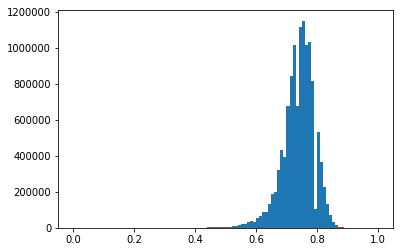

In [24]:
plt.hist(df.global_efficiency, bins=100)

In [26]:
uniques, counts = np.unique(df.global_efficiency, return_counts=True)

In [27]:
max(counts)

658246

In [28]:
uniques[np.argmax(counts)]

0.7777778

In [30]:
df2 = df[df.global_efficiency == uniques[np.argmax(counts)]]

In [32]:
uniques, counts = np.unique(df2.global_clustering_coefficient, return_counts=True)

In [34]:
def return_max_value(dataframe, col):
    uniques, counts = np.unique(dataframe[col], return_counts=True)
    
    return uniques[np.argmax(counts)]

In [36]:
df3 = df2[df2.global_clustering_coefficient == return_max_value(df2, 'global_clustering_coefficient')]

In [38]:
df3.nunique()

num_edges                            1
is_planar                            1
total_triangles                      1
triangle_ratio                       1
avg_shortest_path_length             1
global_clustering_coefficient        1
avg_clustering_coefficient         352
diameter                             1
square_clustering                21950
degree_assortativity               143
density                              1
node_connectivity                    3
global_efficiency                    1
local_efficiency                  4210
modularity                          55
dtype: int64

In [40]:
df4 = df3[df3.avg_clustering_coefficient == return_max_value(df3, 'avg_clustering_coefficient')]

In [41]:
df4.nunique()

num_edges                          1
is_planar                          1
total_triangles                    1
triangle_ratio                     1
avg_shortest_path_length           1
global_clustering_coefficient      1
avg_clustering_coefficient         1
diameter                           1
square_clustering                446
degree_assortativity              22
density                            1
node_connectivity                  2
global_efficiency                  1
local_efficiency                 265
modularity                        25
dtype: int64

In [42]:
df4.shape

(446, 15)

In [43]:
df5 = df4[df4.degree_assortativity == return_max_value(df4, 'degree_assortativity')]

In [44]:
df5.shape

(69, 15)

In [46]:
df5.nunique()

num_edges                         1
is_planar                         1
total_triangles                   1
triangle_ratio                    1
avg_shortest_path_length          1
global_clustering_coefficient     1
avg_clustering_coefficient        1
diameter                          1
square_clustering                69
degree_assortativity              1
density                           1
node_connectivity                 1
global_efficiency                 1
local_efficiency                 55
modularity                       18
dtype: int64

In [47]:
np.unique(df5.modularity, return_counts=True)

(array([0.0728, 0.0992, 0.1   , 0.1008, 0.1024, 0.1112, 0.1224, 0.1272,
        0.1288, 0.1296, 0.1336, 0.1352, 0.1368, 0.14  , 0.1408, 0.16  ,
        0.1728, 0.1792], dtype=float32),
 array([ 1,  7, 11,  2,  4, 11,  2,  1,  7,  3,  1,  2,  1,  9,  4,  1,  1,
         1]))

In [48]:
df6 = df5[df5.modularity == return_max_value(df5, 'modularity')]

In [50]:
df6.shape

(11, 15)

In [51]:
df6.nunique()

num_edges                         1
is_planar                         1
total_triangles                   1
triangle_ratio                    1
avg_shortest_path_length          1
global_clustering_coefficient     1
avg_clustering_coefficient        1
diameter                          1
square_clustering                11
degree_assortativity              1
density                           1
node_connectivity                 1
global_efficiency                 1
local_efficiency                 11
modularity                        1
dtype: int64

In [52]:
df6

,num_edges,is_planar,total_triangles,triangle_ratio,avg_shortest_path_length,global_clustering_coefficient,avg_clustering_coefficient,diameter,square_clustering,degree_assortativity,density,node_connectivity,global_efficiency,local_efficiency,modularity
6825175,25,False,54,0.15,1.444444,0.504673,0.539524,2.0,0.361651,-0.301453,0.555556,3,0.777778,0.727103,0.1
9600640,25,False,54,0.15,1.444444,0.504673,0.539524,2.0,0.353214,-0.301453,0.555556,3,0.777778,0.754841,0.1
9609096,25,False,54,0.15,1.444444,0.504673,0.539524,2.0,0.358304,-0.301453,0.555556,3,0.777778,0.756825,0.1
10085903,25,False,54,0.15,1.444444,0.504673,0.539524,2.0,0.341649,-0.301453,0.555556,3,0.777778,0.757024,0.1
10085905,25,False,54,0.15,1.444444,0.504673,0.539524,2.0,0.355999,-0.301453,0.555556,3,0.777778,0.754008,0.1
10086720,25,False,54,0.15,1.444444,0.504673,0.539524,2.0,0.340566,-0.301453,0.555556,3,0.777778,0.759524,0.1
10132720,25,False,54,0.15,1.444444,0.504673,0.539524,2.0,0.357684,-0.301453,0.555556,3,0.777778,0.754564,0.1
10132727,25,False,54,0.15,1.444444,0.504673,0.539524,2.0,0.345561,-0.301453,0.555556,3,0.777778,0.757659,0.1
10132978,25,False,54,0.15,1.444444,0.504673,0.539524,2.0,0.347680,-0.301453,0.555556,3,0.777778,0.759048,0.1
10134603,25,False,54,0.15,1.444444,0.504673,0.539524,2.0,0.347545,-0.301453,0.555556,3,0.777778,0.758413,0.1


In [55]:
graphs = nx.read_graph6('./data/graph10.g6')

In [57]:
idx = df6.index

In [62]:
subset = [graphs[i] for i in idx]

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.animation import FuncAnimation

/home/j1c/graphstats/venv/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


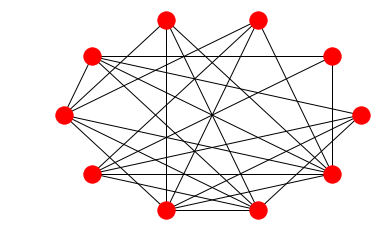

In [76]:
fig, ax = plt.subplots(figsize=(6,4))
pos = nx.circular_layout(subset[0])
ax.axis('off')

def update(i):
    ax.clear()
    nc = subset[i]
    nx.draw_circular(nc, ax=ax)

ani = FuncAnimation(fig, update, interval=20, frames=range(10), repeat=True)
ani.save('crap.gif', writer='imagemagick',  savefig_kwargs={'facecolor':'white'}, fps=1)

In [ ]:
def subsample(dataframe, cols):
    """
    subsample the dataframe by taking the most common unique value given 
    the list of columns.    
    """
    tmp = dataframe
    for col in cols:
        